# BIG DATA: Precio de pisos competición (plantilla)
### Cargar las librerías

In [1]:
# Import numpy library and rename it 'np'
import numpy as np 
# Import panda library and rename it 'pd'
import pandas as pd 
# To configure the Pandas library so that it displays all columns and avoid truncation (...)
pd.set_option('display.max_columns', None)

# Import matplotlib and give alias 'plt'
# Uses pyplot for interactive plots and simple cases of programmatic plot generation
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18}) # Font size for all elements in the table
#plt.style.use('fivethirtyeight') replicates the styles from FiveThirtyEight.com

import xgboost as xgb
## https://matplotlib.org/stable/users/explain/customizing.html

# Imports seaborn and give alias 'sns'
import seaborn as sns
sns.set(font_scale=1.5)

# Imports scikitlearn without any alias but the output is transformed to work in pandas
import sklearn
sklearn.set_config(transform_output="pandas")

# suppress eli5 warning
import warnings
warnings.filterwarnings("ignore")

### Leer el fichero que contiene el dataset
[`pandas.read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

In [2]:
# Here we are telling pandas to read our dataset and saving it as a variable 'dataset'
dataset = pd.read_csv("/kaggle/input/big-data-granada-precio-de-pisos-competicin/train.csv", index_col="piso_id")

# We list the index column that starts with 0 as 'piso_id'

# Parte 1a: EDA: Análisis exploratorio de datos

[`pandas.DataFrame.shape`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html)dataset.shape

In [3]:
# We've called our dataframe 'dataset'
# Before we start working, we want to know how many rows and colums we are working with
dataset.shape

(10852, 16)

### ¿El *target* (en este caso la columna `precios`) es binario (`0` o `1`) o continuo? Es decir, ¿es una problema de clasificacion  o regresión? [(Info)](https://www.springboard.com/blog/data-science/regression-vs-classification/)

[**Variable types**](https://www.codecademy.com/learn/stats-variable-types/modules/stats-variable-types/cheatsheet)can be either quantitative or categorical. *Quantitative variables* are amounts or counts; for example, age, number of children, and income are all quantitative variables. *Categorical variables* represent groupings; for example, type of pet, agreement rating, and brand of shoes are all categorical variables.

**Quantitative variables** are numeric in nature and can be either *continuous* or *discrete*. 
    a. *Continuous variables*: contain measurements with decimal precision, for example the height or weight of a person.
    b. *Discrete variables*: contain counts that must be whole integer values, such as the number of members in a person’s family, or the number of goals a basketball team scored in a game.

**Categorical Variables** consist of data that can be grouped into distinct categories, and are *ordinal* or *nominal*.
    a. *Ordinal Categorical Variables*: 
    b. *Nominal Categorical variables*:
    c. *Binary Categorical variables*:





In [4]:
# Listing single column from our dataframe using 'dataframe['column_name']'
print("Printing a single column from our dataset: Precio")
print(dataset["precio"].value_counts())
# Value counts are the frequency of unique values in a column of a dataframe

Printing a single column from our dataset: Precio
precio
550000     104
650000      85
135000      85
350000      78
260000      76
          ... 
581500       1
1225000      1
264900       1
789650       1
399999       1
Name: count, Length: 1561, dtype: int64


### Echar un vistazo a los datos

In [5]:
dataset

,m2_edificados,m2_útiles,n_habitaciones,n_baños,planta,precio_alquiler,precio_zona,necesita_reforma,nueva_construcción,año_construción,ascensor,exterior,aparcamiento,precio_aparcamiento,orientación,precio
piso_id,,,,,,,,,,,,,,,,
0,114.0,104.0,4,2,7,881.0,1658,1,0,1970.0,1,1,0,NaN,este,189000
1,85.0,70.0,2,2,3,NaN,6588,1,0,NaN,1,1,0,NaN,desconocido,560000
2,340.0,299.0,6,4,3,2516.0,2882,0,0,1989.0,1,1,1,0.0,este,980000
3,51.0,49.0,2,1,4,777.0,3118,0,0,1965.0,0,1,0,NaN,sur,159000
4,210.0,NaN,3,3,1,NaN,8524,0,0,NaN,1,1,0,NaN,desconocido,1790000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10847,204.0,NaN,4,3,5,2417.0,4167,0,0,NaN,1,1,1,0.0,desconocido,850000
10848,100.0,NaN,4,2,-1,1438.0,3995,0,0,NaN,1,1,0,NaN,este,399500
10849,64.0,55.0,2,1,1,1006.0,3578,0,0,2017.0,1,1,1,40000.0,desconocido,229000


[`pandas.DataFrame.columns`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.columns.html)

In [6]:
# All values are replaced with a Boolean value True for NULL values, and otherwise False
dataset.isnull

<bound method DataFrame.isnull of          m2_edificados  m2_útiles  n_habitaciones  n_baños  planta  \
piso_id                                                              
0                114.0      104.0               4        2       7   
1                 85.0       70.0               2        2       3   
2                340.0      299.0               6        4       3   
3                 51.0       49.0               2        1       4   
4                210.0        NaN               3        3       1   
...                ...        ...             ...      ...     ...   
10847            204.0        NaN               4        3       5   
10848            100.0        NaN               4        2      -1   
10849             64.0       55.0               2        1       1   
10850            260.0      224.0               5        3       3   
10851             70.0        NaN               2        2       3   

         precio_alquiler  precio_zona  necesita_reforma

In [7]:
# Returns the column labels of the given dataframe
dataset.columns

Index(['m2_edificados', 'm2_útiles', 'n_habitaciones', 'n_baños', 'planta',
       'precio_alquiler', 'precio_zona', 'necesita_reforma',
       'nueva_construcción', 'año_construción', 'ascensor', 'exterior',
       'aparcamiento', 'precio_aparcamiento', 'orientación', 'precio'],
      dtype='object')

### ejemplo de como calcular la mínima, máxima y varianza de una columna

In [8]:
# Replace ["column_name"]
# print("min:", dataset["m2_útiles"].min())
# print("max:", dataset["m2_útiles"].max())
# print("var:", dataset["m2_útiles"].var())

print("min:", dataset["precio_alquiler"].min())
print("max:", dataset["precio_alquiler"].max())
print("var:", dataset["precio_alquiler"].var())

min: 0.0
max: 2517.0
var: 434516.91315912845


### Estadísticas descriptivas
[`pandas.DataFrame.describe`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)

In [9]:
# Returns description of the data
# If the DataFrame contains numerical data, the description contains:
# Columns: count, mean, std, min, 25%, 50%, 75%, max

dataset.describe().T.style.background_gradient(cmap='RdPu', axis=1).format(precision=1)

,count,mean,std,min,25%,50%,75%,max
m2_edificados,10852.0,120.8,82.4,18.0,70.0,95.0,141.0,894.0
m2_útiles,4287.0,94.0,57.4,1.0,60.0,78.0,110.0,540.0
n_habitaciones,10852.0,2.9,1.2,0.0,2.0,3.0,3.0,13.0
n_baños,10852.0,1.8,1.0,1.0,1.0,2.0,2.0,14.0
planta,10852.0,2.5,2.1,-1.0,1.0,2.0,4.0,9.0
precio_alquiler,8663.0,1231.4,659.2,0.0,773.0,1148.0,1712.0,2517.0
precio_zona,10852.0,4069.3,1921.0,447.0,2566.8,3826.5,5085.0,18889.0
necesita_reforma,10852.0,0.2,0.4,0.0,0.0,0.0,0.0,1.0
nueva_construcción,10852.0,0.1,0.2,0.0,0.0,0.0,0.0,1.0
año_construción,5067.0,1967.5,92.4,1800.0,1955.0,1968.0,1985.0,8170.0


### Correlación (Pearson)
[`pandas.DataFrame.corr`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)

In [10]:
# Correlation Test: strength of the association between two variables
# Parametric Correlation : It measures a linear dependence between two variables (x and y)
# it is known as a parametric correlation test because it depends on the distribution of the data.
#  The most commonly used method is the Parametric correlation method using the Pearson Correlation formula
# x and y are two vectors of length n 
# m, x and m, y corresponds to the means of x and y, respectively.
dataset.corr(method='pearson', numeric_only=True).style.background_gradient(cmap='coolwarm', axis=None).format(precision=2)

,m2_edificados,m2_útiles,n_habitaciones,n_baños,planta,precio_alquiler,precio_zona,necesita_reforma,nueva_construcción,año_construción,ascensor,exterior,aparcamiento,precio_aparcamiento,precio
m2_edificados,1.00,0.98,0.70,0.81,0.14,-0.02,0.36,0.14,-0.02,-0.02,0.31,0.18,0.32,0.04,0.87
m2_útiles,0.98,1.00,0.72,0.80,0.14,0.18,0.32,0.13,-0.02,-0.06,0.30,0.17,0.30,0.02,0.87
n_habitaciones,0.70,0.72,1.00,0.64,0.15,0.11,0.07,0.24,-0.09,-0.02,0.18,0.19,0.19,0.04,0.51
n_baños,0.81,0.80,0.64,1.00,0.12,0.10,0.42,0.05,0.03,-0.01,0.36,0.15,0.35,0.06,0.75
planta,0.14,0.14,0.15,0.12,1.00,0.07,0.11,0.05,-0.01,0.02,0.19,0.03,0.12,0.01,0.14
precio_alquiler,-0.02,0.18,0.11,0.10,0.07,1.00,0.18,-0.03,0.08,0.02,0.33,0.01,0.14,-0.01,-0.11
precio_zona,0.36,0.32,0.07,0.42,0.11,0.18,1.00,-0.06,0.06,-0.06,0.39,-0.10,0.12,0.17,0.67
necesita_reforma,0.14,0.13,0.24,0.05,0.05,-0.03,-0.06,1.00,-0.13,-0.06,-0.02,-0.03,-0.08,0.05,0.08
nueva_construcción,-0.02,-0.02,-0.09,0.03,-0.01,0.08,0.06,-0.13,1.00,nan,0.13,0.06,0.12,-0.07,-0.01
año_construción,-0.02,-0.06,-0.02,-0.01,0.02,0.02,-0.06,-0.06,nan,1.00,0.07,0.08,0.14,-0.15,-0.04


* r takes value between -1 (negative correlation) and 1 (positive correlation).
* r = 0 means no correlation.
* Can not be applied to ordinal variables.
* The sample size should be moderate (20-30) for good estimation.
* Outliers can lead to misleading values means not robust with outliers.

Here are some important facts about the Pearson correlation coefficient:

The Pearson correlation coefficient can take on any real value in the range −1 ≤ r ≤ 1.

The maximum value r = 1 corresponds to the case in which there’s a perfect positive linear relationship between x and y. In other words, larger x values correspond to larger y values and vice versa.

The value r > 0 indicates positive correlation between x and y.

The value r = 0 corresponds to the case in which there’s no linear relationship between x and y.

The value r < 0 indicates negative correlation between x and y.

The minimal value r = −1 corresponds to the case when there’s a perfect negative linear relationship between x and y. In other words, larger x values correspond to smaller y values and vice versa.

* Pearson’s r Value --> Correlation Between x and y
* equal to 1 --> perfect positive linear relationship
* greater than 0 --> positive correlation
* equal to 0 --> no linear relationship
* less than 0 --> negative correlation
* equal to -1 --> perfect negative linear relationship


### ejemplo de un scatter plot

In [11]:
# fig, ax = plt.subplots(figsize=(12, 6))

# ax.scatter(x=dataset["m2_edificados"], y=dataset["precio"], c='blue', label="data", s=2)

# como cambiar los limites del plot:
#ax.set(xlim=(0, 100), ylim=(0, 100))

# ax.set_xlabel ("m2_edificados")
# ax.set_ylabel ("precio")
# plt.legend(loc="upper right")

# plt.show();

### Ejemplo de un 3D plot con `plotly.express`

In [12]:
# import plotly.express as px
# import plotly.graph_objects as go

# fig = go.Figure()
# fig = px.scatter_3d(x=dataset["m2_edificados"],y=dataset["n_habitaciones"],z=dataset["precio"], 
#                     title="Precio de pisos data",
#                     labels={"x": "m2_edificados","y": "n_habitaciones", "z": "precio"}
#                    )
# fig.update_traces(marker=dict(size=1.5))
# fig.show()

### ejemplo de una [histograma](https://seaborn.pydata.org/generated/seaborn.histplot.html) (+ [ecdf](https://seaborn.pydata.org/generated/seaborn.ecdfplot.html)) con seaborn

In [13]:
#fig, (ax1) = plt.subplots(1, 1, figsize=(15, 5))
#ax2 = ax1.twinx()
#sns.histplot(data=dataset, x="m2_edificados", binwidth=5, ax=ax1)
#sns.ecdfplot(data=dataset, x="m2_edificados", color="red", lw=2,  ax=ax2)
#plt.show();

### contar valores en una columna categórica (variables discretas) con [countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html)

In [14]:
# Seaborn shows the counts of observations in each categorical bin using bars
#fig, (ax1) = plt.subplots(1, 1, figsize=(12, 5))

#sns.countplot(x=dataset["n_habitaciones"]);

### Ejemplo de un seaborn [`lmplot`](https://seaborn.pydata.org/generated/seaborn.lmplot.html) (= scatter + ajuste lineal)

In [15]:
# https://www.geeksforgeeks.org/python-seaborn-lmplot-method/
#sns.lmplot(data=dataset, x="m2_edificados", y="precio", ci=95, 
#           height=8, aspect=1.5, line_kws={'color': 'red'}, scatter_kws={"s": 10});

# Parte 1b: Data cleaning (limpieza de datos)

## [`missingno`](https://github.com/ResidentMario/missingno)

ver los datos ausentes

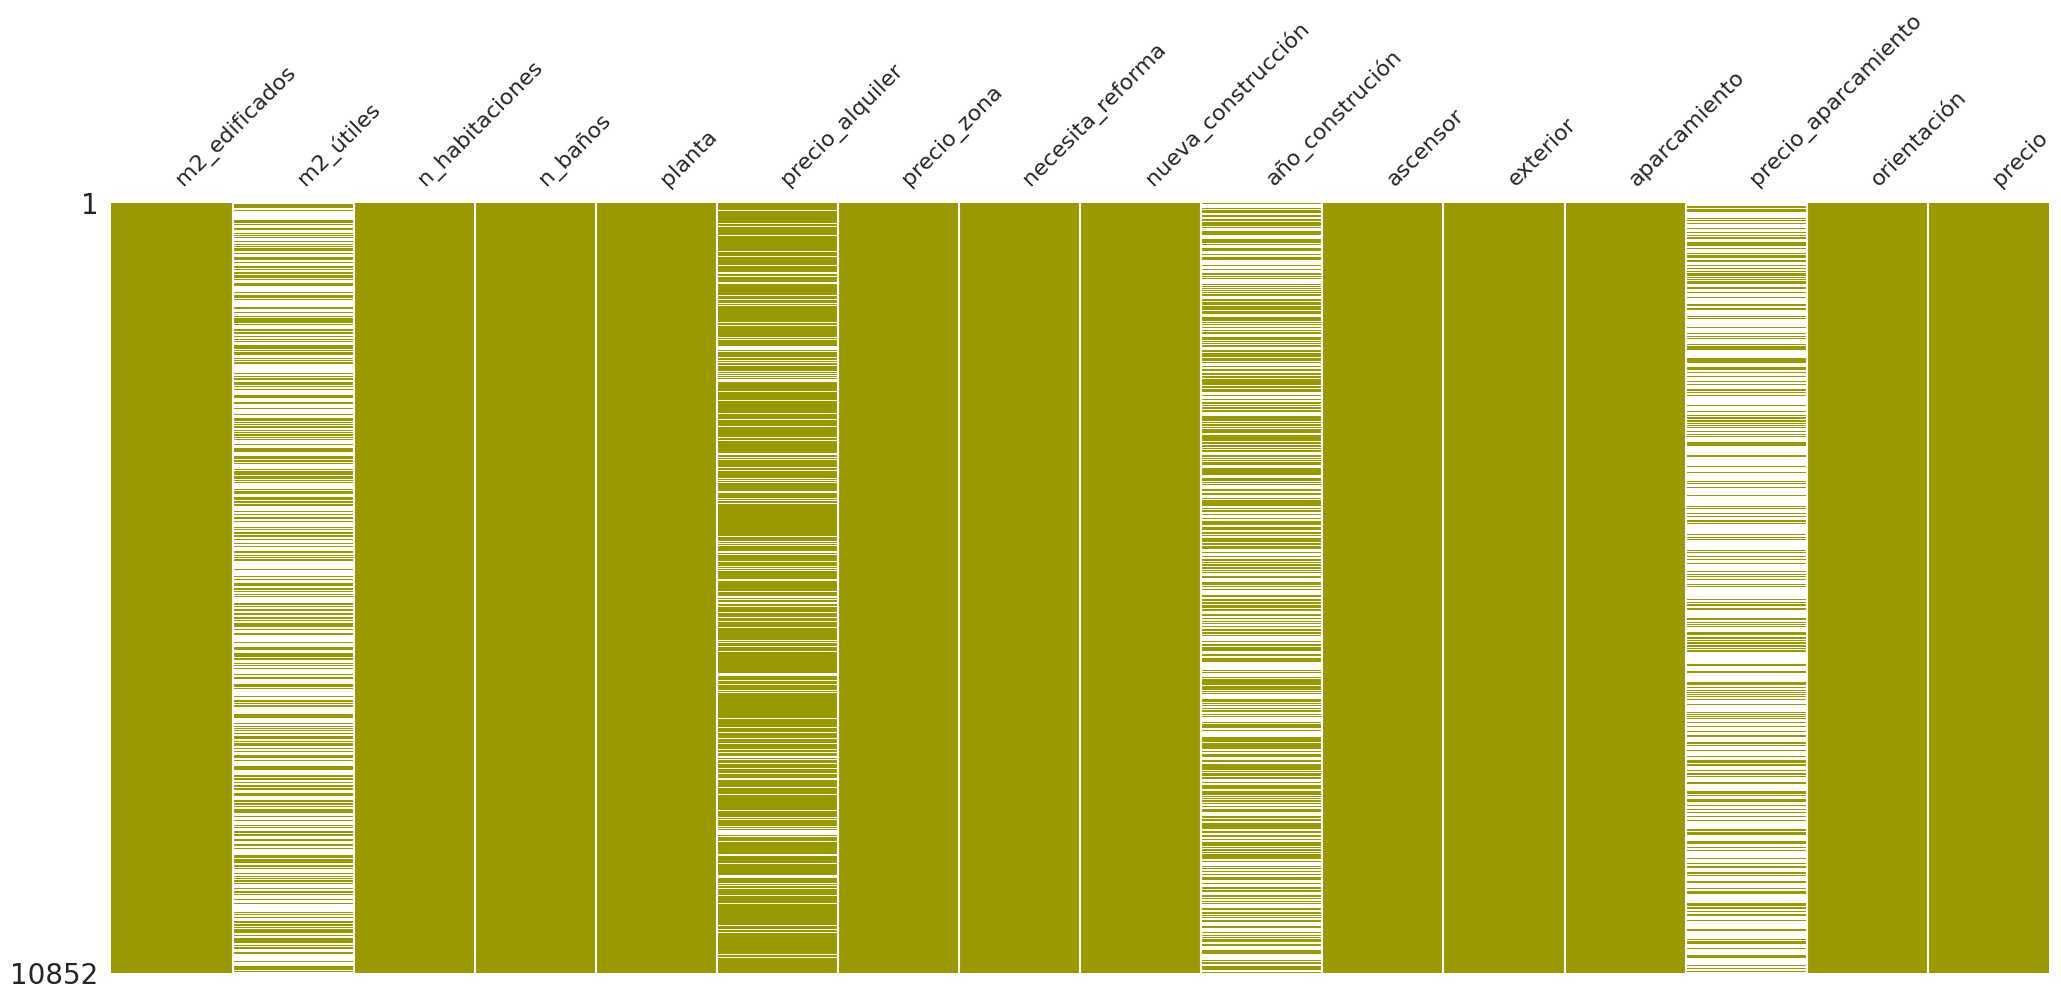

In [16]:
# We import the library 'missingno' as 'msno'
import missingno as msno

# Running 'msno' allows us to see which columns have the most nulls
msno.matrix(dataset, color=(0.6,0.6,0), sparkline=False);

contar los datos ausentes

In [17]:
dataset.isna().sum().sort_values(ascending=False)

precio_aparcamiento    7454
m2_útiles              6565
año_construción        5785
precio_alquiler        2189
m2_edificados             0
n_habitaciones            0
n_baños                   0
planta                    0
precio_zona               0
necesita_reforma          0
nueva_construcción        0
ascensor                  0
exterior                  0
aparcamiento              0
orientación               0
precio                    0
dtype: int64

In [18]:
# Numero total de datos ausentes en el dataset
dataset.isna().sum().sum()

21993

In [19]:
# This is the code to calculate the % of missing in each specific column in my dataframe:
# 'dataset' is my DataFrame
missing_percentage = (dataset.isna().sum() / len(dataset)) * 100

# Create a DataFrame to display the missing percentage for each column
# missing_info = pd.DataFrame({'Column Name': dataset.columns, 'Missing Percentage': missing_percentage})
# Previous line duplicated the index which has been changed to the column names
# To avoid this error because of custom index:
missing_info = pd.DataFrame({'Missing Percentage': missing_percentage})

# Set the index to be the column names
missing_info.index = dataset.columns

# Display the result
print(missing_info)


                     Missing Percentage
m2_edificados                  0.000000
m2_útiles                     60.495761
n_habitaciones                 0.000000
n_baños                        0.000000
planta                         0.000000
precio_alquiler               20.171397
precio_zona                    0.000000
necesita_reforma               0.000000
nueva_construcción             0.000000
año_construción               53.308146
ascensor                       0.000000
exterior                       0.000000
aparcamiento                   0.000000
precio_aparcamiento           68.687799
orientación                    0.000000
precio                         0.000000


**We can exclude columns when they contain a very high percentage of missing values (e.g., more than 50%).**

Eventually after checking our data further down the line, we can see that we can remove entire columns that do not affect our ML outcome.

Variables categóricas, *i.e.* `object`

[`pandas.DataFrame.dtypes`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html)

In [20]:
dataset.dtypes

m2_edificados          float64
m2_útiles              float64
n_habitaciones           int64
n_baños                  int64
planta                   int64
precio_alquiler        float64
precio_zona              int64
necesita_reforma         int64
nueva_construcción       int64
año_construción        float64
ascensor                 int64
exterior                 int64
aparcamiento             int64
precio_aparcamiento    float64
orientación             object
precio                   int64
dtype: object

nota que la columna `orientación` es tipo `object`:

In [21]:
dataset["orientación"].value_counts()

orientación
desconocido    4901
este           2605
sur            1985
oeste           946
norte           415
Name: count, dtype: int64

### Mete todo tu limpieza aquí en este función

Eso es un ejemplo de como reemplazar cualquier valor `NaN` con un 0 en todo el dataframe con [`pandas.DataFrame.fillna`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html) y One-hot encode los categoricals con [`pandas.get_dummies`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html):

In [22]:
print(dataset.columns)


Index(['m2_edificados', 'm2_útiles', 'n_habitaciones', 'n_baños', 'planta',
       'precio_alquiler', 'precio_zona', 'necesita_reforma',
       'nueva_construcción', 'año_construción', 'ascensor', 'exterior',
       'aparcamiento', 'precio_aparcamiento', 'orientación', 'precio'],
      dtype='object')


In [23]:
def cleaning(dataset):
    # Rename a column
    dataset = dataset.rename(columns={'año_construción': 'año_construcción'})
    
    # Fix erroneous values
    dataset = dataset.replace({"año_construción": 8170 }, {"año_construción": 1870 })
    
    # Remove columns with more than 50% missing data
    dataset = dataset.drop(["precio_alquiler", "m2_útiles", "precio_aparcamiento", "exterior", "nueva_construcción", "orientación", "aparcamiento", "año_construcción", "necesita_reforma", "n_baños", "planta", "n_habitaciones", "ascensor"], axis=1)

    # Remove columns with zero variance
    dataset = dataset.drop(dataset.columns[dataset.nunique() == 1], axis=1)

    # Codify categorical columns to nominal values
    dataset = pd.get_dummies(dataset, drop_first=True)
    
    # Create a new column 'property_value'
    dataset["property_value"] = dataset["precio_zona"] * dataset["m2_edificados"]
    dataset = dataset.drop(["precio_zona", "m2_edificados"], axis=1)

    # Convert float columns to integers
    float_columns = dataset.select_dtypes(include='float')
    dataset[float_columns.columns] = dataset[float_columns.columns].astype('int')

    # Fill missing values with an extreme value (e.g., -999)
    dataset = dataset.fillna(-999)

    return dataset


In [24]:
# echar un vistazo a nuestro dataset ya "limpiado"
cleaning(dataset)

,precio,property_value
piso_id,,
0,189000,189012
1,560000,559980
2,980000,979880
3,159000,159018
4,1790000,1790040
...,...,...
10847,850000,850068
10848,399500,399500
10849,229000,228992


# Parte 2: Un modelo de Machine Learning

### Crear `X` e `y` de `train`
[`pandas.DataFrame.drop`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)

In [25]:
# We are copying our entire dataset into 'X'
X = dataset
# Our target are the prices, 'precio'; but we delete it
X = X.drop(["precio"], axis=1) 
# X is redefined as X without the 'precio' column

# And so now what we do is replace 'precio' with this new 'y' column
y = dataset["precio"]

### Crear nuestros `train` y `validation` datasets (con un 80%-20% split usando `test_size=0.20`)
[`sklearn.model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [26]:
# And so we are using 20% to do our test at random, row by row, so that we are left with 80/20
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.20, random_state=2)
# test_size defines the test set
# With this operation, we create the diagram on pg 80

Para regresión lineal vamos a re-escalar los datos usando el [`RobustScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)

In [27]:
from sklearn.preprocessing import RobustScaler
RS = RobustScaler() # to rescale everything

In [28]:
# haz data cleaning de X_train and rename 
X_train       = cleaning(X_train)
# guardar los nombres de las columnas
feature_names = X_train.columns.tolist()
# re-escalar
X_train       = RS.fit_transform(X_train)

# haz data cleaning of X_validation
X_validation = cleaning(X_validation)
# re-escalar
X_validation = RS.transform(X_validation)

# The data that we will have in the end will be used into our M.L. algorithm
# 

## Baseline model

Calcular el RMSE score para el model "baseline" con
[`sklearn.metrics.mean_squared_error`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html), donde

 $$\large {\mathrm {RMSE}}  = \sqrt{\frac{1}{n} \sum_{i=1}^n \left(y_i-\hat{y_i}\right)^2} $$

In [29]:
# We calculate and establish the baseline
y_train_mean = pd.Series(y_train.mean(), index=range(len(y_validation)))

from sklearn.metrics import mean_squared_error
print("RMSE del baseline: ",round(mean_squared_error(y_validation, y_train_mean, squared=False),1))

# The worst model and worst case because we haven't considered any data
# It is good practice to calculate the baseline model

RMSE del baseline:  616867.6


In [30]:
# https://scikit-learn.org/stable/modules/ensemble.html
# https://towardsdatascience.com/ensemble-methods-in-machine-learning-what-are-they-and-why-use-them-68ec3f9fef5f
# https://analyticsindiamag.com/step-by-step-building-block-for-machine-learning-models/
# We use an ensemble method that combines several base models in order to produce one optimal predictive model:

## Linear Regression
[`sklearn.linear_model.LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Aquí, en estos dos lineas de código, es donde definimos que estimador vamos a usar:

In [31]:
# We finally start machine learning here
# We start with a linear regression with 'casas'
# We don't have to use the linear equation here because here we set up the model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
#regressor.fit(X_train, y_train)
#y_pred_LR = regressor.predict(X_validation)


# Day 4: To prevent overfitting, we use a better model:
#from sklearn.ensemble import RandomForestRegressor
#regressor = RandomForestRegressor(max_depth= 50,
#                                 min_samples_leaf = 2,
#                                 n_estimators = 100,
#                                 random_state = 42)

#Day 4: We remove the RandomForest
#Day 4: We re-establish the linear regression and set a 'y_pred'

## Decision Tree

In [32]:
# Day 3: It is better to replace the linear regression with a Decision Tree
#from sklearn.tree import DecisionTreeRegressor
#regressor = DecisionTreeRegressor(max_depth = 50, #15 #18 #25
#                                  min_samples_leaf = 3, #2 #3
#                                  random_state = 42) #42
#regressor.fit(X_train, y_train)
#y_pred_DT = regressor.predict(X_validation)

## Random Forest

In [33]:
# Day 4: To prevent overfitting, we use a better model:
#from sklearn.ensemble import RandomForestRegressor
#regressor = RandomForestRegressor(max_depth= 50,
#                                  min_samples_leaf = 2,
#                                  n_estimators = 100,
#                                  random_state = 42)
#regressor.fit(X_train, y_train)
#y_pred_RF = regressor.predict(X_validation)
#Day 4: We remove the RandomForest
#Day 4: We re-establish the linear regression

y ahora hacer el ajuste (`fit`) con nuestro regressor

## Grid Search:

In [34]:
# Finding the best set of hyper-parameters:
#from sklearn.model_selection import GridSearchCV
#param_grid = {"max_depth": [9, 11, 13],
#                  "n_estimators": [700, 1200, 2000],
#                  "learning_rate": [0.01, 0.015]}

#search = GridSearchCV(regressor, param_grid, cv=5).fit(X_train, y_train)

#print("The best hyperparameters are ",search.best_params_)

# The best hyperparameters are  {'learning_rate': 0.01, 'max_depth': 11, 'n_estimators': 2000}


## XGBoost Regression

In [35]:
# We take the best hyperparameters and feed them:
#regressor=xgb.XGBRegressor(learning_rate = 0.01,
#                           n_estimators = 2000,
#                           max_depth = 11,
#                           missing = -999,
#                           eval_metric = 'rmse')
 
#regressor.fit(X_train, y_train)
#y_pred_XGB = regressor.predict(X_validation)

In [36]:
# We use an ensemble approach to improve prediction accuracy by combining the strengths of multiple models
#y_pred_ensemble = np.mean(np.array([y_pred_RF ,y_pred_XGB, y_pred_LR, y_pred_DT]),axis=0)
# 'y_pred_ensemble' is the ensemble prediction
# 'y_pred_RF', 'y_pred_XGB', 'y_pred_LR', and 'y_pred_DT' are variables that contain the predictions made by each of the four machine learning models
# np.array([y_pred_RF, y_pred_XGB, y_pred_LR, y_pred_DT]): creates an array where each column corresponds to a prediction
# 'np.mean(..., axis=0)': calculates the mean along the 0-axis (which is the vertical axis, i.e., it calculates the mean for each column); computes an average from the average of the predictions from all four models


In [37]:
# Fit is used to adjust, and so we are adjusting the following x features y response (valores); y is training
regressor.fit(X_train, y_train)

LinearRegression()

## Predicciones para los datos de `X_validation`
y ya predecir nuestros valores de `y_validation`, llamados `y_pred`

In [38]:
# Once we train the model, we take 'validation' that didnt form part of the training
# And we ask it to predict the following data and save it in a new column: 'y_pred'
y_pred = regressor.predict(X_validation)
# And so for every X it will create a serie of numbers

In [39]:
# from sklearn.tree import export_graphviz
# import graphviz

# dot_data = export_graphviz(regressor, filled=True, rounded=True, proportion=False)
# graphviz.Source(dot_data)

#### Dibujar nuestros predicciones

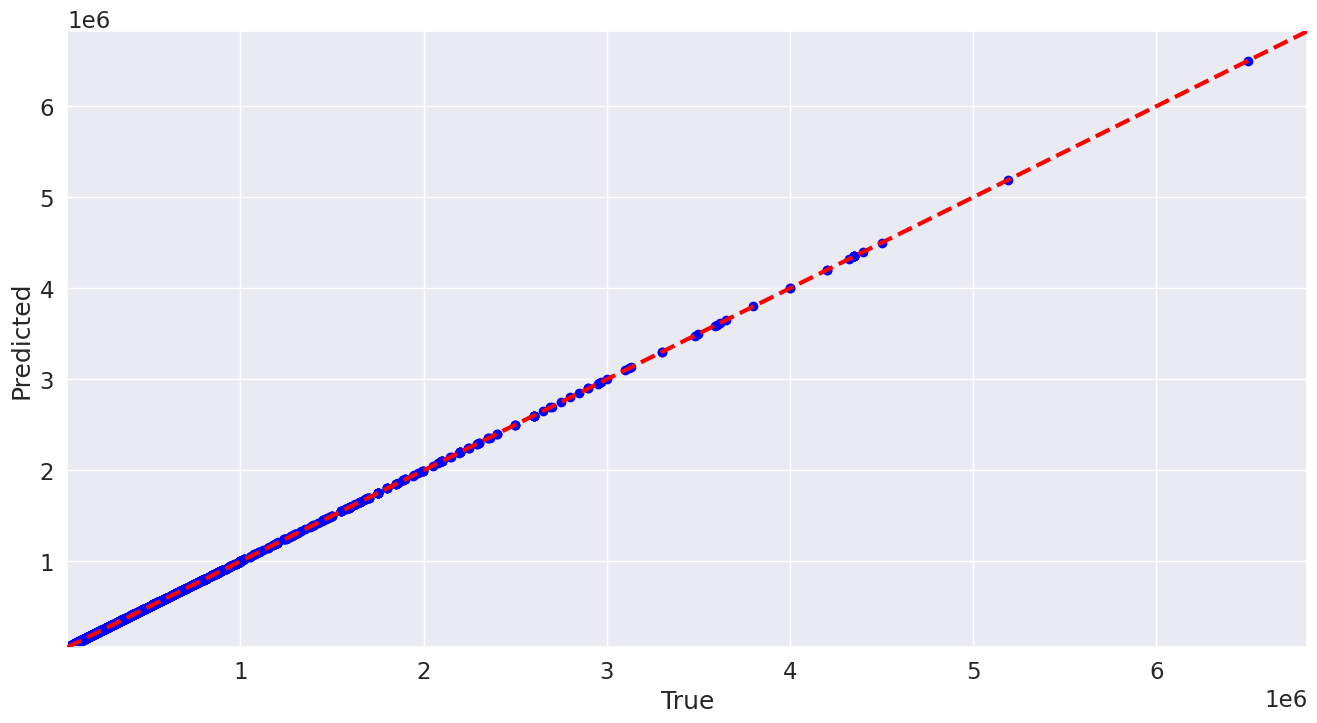

In [40]:
# Here we will make a plot chart displaying the real data and the predicted data

fig, ax = plt.subplots(figsize=(16, 8))
ax.axline([0, 0], [1, 1], color = "red", linestyle='--', lw=3, zorder=3)
ax.scatter(x=y_validation, y=y_pred, c='blue', label="data")

minimum = min(y_pred.min(), y_validation.min())
plt.xlim(minimum)
plt.ylim(minimum)
plt.xlabel('True')
plt.ylabel('Predicted')

plt.show();

#### Histograma de los residuos

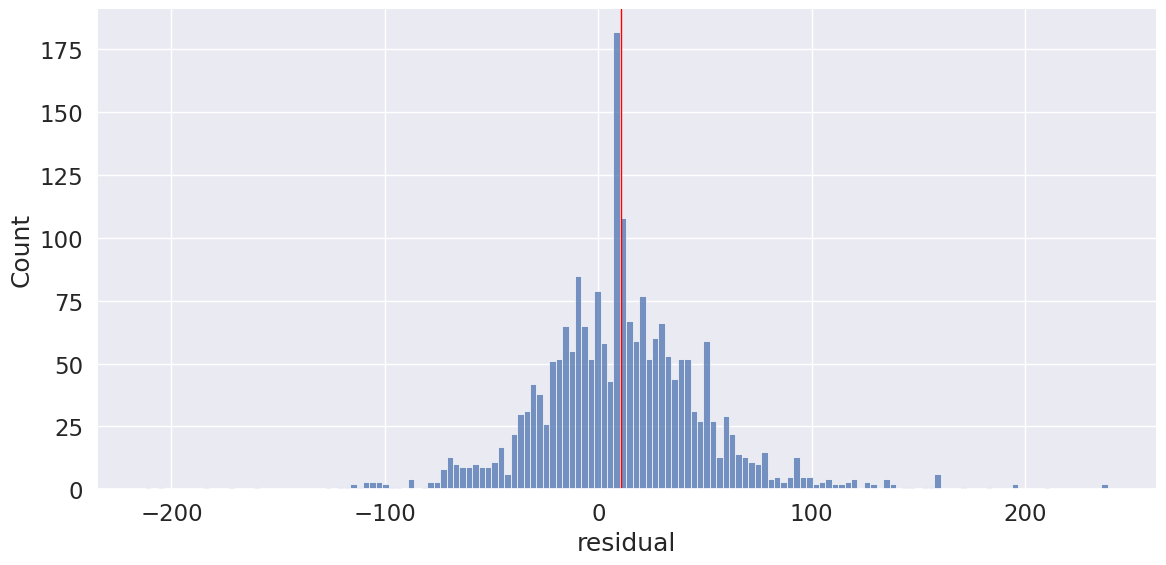

In [41]:
residual_mean = (y_validation - y_pred).mean()

sns.displot( (y_validation - y_pred), bins=150, height=6, aspect=2)

plt.xlabel('residual')
# dibuja una linea vertical rojo
plt.axvline(residual_mean, color="red", lw=1);

In [42]:
print("min residual= ",round( ((y_validation - y_pred).min()),-3))
print("max residual=  ",round( ((y_validation - y_pred).max()),-3))

min residual=  -0.0
max residual=   0.0


#### Calcular el RMSE score para los datos de `test` en el dataframe `X_validation`

Comparar nuestro `y_pred` con los valores de verdad (`y_validation`)

In [43]:
# This is the result of machine learning
print("RMSE de los datos de validacion: ",round(mean_squared_error(y_validation, y_pred, squared=False),1))

RMSE de los datos de validacion:  42.0


## También vamos a calcular un 5-fold cross-validation (CV) RMSE score
usando [`sklearn.model_selection.cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

In [44]:
from sklearn.model_selection import cross_val_score
# vamos a usar el RMSE
from sklearn.metrics import make_scorer
RMSE = make_scorer(mean_squared_error, squared=False)

# limpiamos los datos de X
X = cleaning(X)
X = RS.fit_transform(X)

# Cross validation 5x; we used 5 models to do a standard desviation to have a range of error with our prediction
CV_scores = cross_val_score(regressor, X, y, cv=5, scoring=RMSE)

# imprimir los resultados a la pantalla
#print("* CV scores:                       ",CV_scores)
print("* RMS del los CV RMSE:             ",round(np.sqrt(np.mean(np.square(CV_scores))),1))
print("* Desviación estándar del CV score: ",round(np.std(CV_scores),1))

# Not a great model but to give us a general idea

* RMS del los CV RMSE:              511.3
* Desviación estándar del CV score:  358.4


### Ver los "*pesos*" (*p.ej.* los $\beta_1$ en regresión lineal) asociados con cada columna (nota que `<BIAS>` es $\beta_0$)

In [45]:
# Here we print a table of B1
import eli5

eli5.show_weights(regressor, top=None, feature_names = feature_names )

Weight?,Feature
+458951.942,property_value
+349031.791,<BIAS>


### Ejemplo de como calcular la [permutation importance](https://scikit-learn.org/stable/modules/permutation_importance.html) de los features

In [46]:
from eli5.sklearn import PermutationImportance

perm_import = PermutationImportance(regressor, random_state=1).fit(X_train, y_train)

eli5.show_weights(perm_import, top=None, feature_names = feature_names)

Weight,Feature
2.0104 ± 0.0375,property_value


# Evaluacón final: predicciones para los datos de `X_test`

Leer los datos del ``test``

In [47]:
X_test  = pd.read_csv("/kaggle/input/big-data-granada-precio-de-pisos-competicin/test.csv", index_col="piso_id")

In [48]:
X_test.shape

(4652, 15)

Limpiar `X_test` del mismo manera que los datos de entrenamiento `X_train`

In [49]:
# data cleaning
X_test = cleaning(X_test)
# usar la misma transformación que la aplicada a los datos de entrenamiento:
X_test = RS.transform(X_test)

### Usar nuestro modelo para predecir todos los valores `y_pred` ($\hat{y}$) para los datos `test` finales

In [50]:
# We do a test of this data
y_pred = regressor.predict(X_test)

### Escribir un fichero `submission.csv` con tus $\hat{y}$
Nuestro Leaderboard score será el RMSE entre los datos escritos en `submission.csv` y los datos `y_true` "secretos"

In [51]:
sample_submission = pd.read_csv("/kaggle/input/big-data-granada-precio-de-pisos-competicin/sample_submission.csv")
sample_submission["precio"] = y_pred
sample_submission.to_csv('submission.csv',index=False)

In [52]:
sample_submission.head()

,piso_id,precio
0,10852,9.909507e+05
1,10853,1.251362e+06
2,10854,4.301100e+05
3,10855,1.066675e+05
4,10856,5.652887e+05


# ¿Como entregar tus predicciones al [leaderboard](https://www.kaggle.com/competitions/big-data-mlaga-precio-de-pisos-competicin/leaderboard)?

Cuando estas contento con tu notebook, y quieres entregar tu trabajo para su evaluación (es decir, hacer una *submission*) en el lado derecho de tu pantalla ir a **Submit to competition** y pinchar sobre **Submit**. 